# CME538 - Introduction to Data Science
## Tutorial 8 - Classification, metrics, gridsearch

### Goals

In this tutorial, we would like to train a model to predict if it will rain tomorrow in Australia. 
As the answer to this question is either **YES** or **No** (binary), we can see this problem as a binary classification problem. To this end, we train a logitic classifier model.

### Tutorial Structure


1. [Exploratory Analysis](#section1)

2. [Preprocessing](#section2)

3. [Model Training](#section3)

4. [Model Evaluation](#section4)


***    
This notebook is mainly based on:


[[1]](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) Rain in Australia

[[2]](https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling/data) Extensive Analysis - EDA + Preprocessing + FE + Modelling

<a id='section0'></a>
## Setup Notebook
At the start of a notebook, we need to import the Python packages we plan to use.


In [235]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt


from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

<a id='section1'></a>

# Exploratory analysis


In this step we import the dataset and explore its features. We use the Rain in Australia dataset for this tutorial. 

In [3]:
data = 'weatherAUS.csv'
#df = ...

#df.head()

Let's have a look at the dataset shape and some general info

In [4]:
#Write your code here

In [5]:
#Write your code here

### Target Variable: 'RainTomorrow'


We are interested in the column 'RainTomrrow' which indicates whether we are going to have rain tomorrow or not.

In [6]:
#Write your code here

We should always be careful about missing data

In [7]:
#Write your code here

In [8]:
#Write your code here

We can see that we are missing over 3000 values which is about 3 percent of our data. We need to remove these instances from our dataset.

In [9]:
#Write your code here

Let's see how many of each value there is in the data set. We can plot this as well.

In [10]:
#Write your code here

In [11]:
#Write your code here

We can also use sns library for this purpose:

In [12]:
#Write your code here

Or, matplotlib:

In [13]:
#Write your code here

### Categorical Vs Numerical

In later steps, we will need to develop a model where by using a set of features, we predict whether it's going to rain or not. These models are based on numerical analysis and as a reuslt, it is important that we check whether our features are numerical or not. 
If a feature is not numerical, we will need to find a way to convert it to one.

we can use the dtype method to capture the categorical features

In [14]:
#Write your code here

LEt's see if these features have missing vlues or not

In [15]:
#Write your code here

Let's also check how many unique values each of the features have

In [16]:
#Write your code here

 A common approach for dealing with the categorical values is using encoding methods. See the image below, captured from https://www.kaggle.com/alexisbcook/categorical-variables

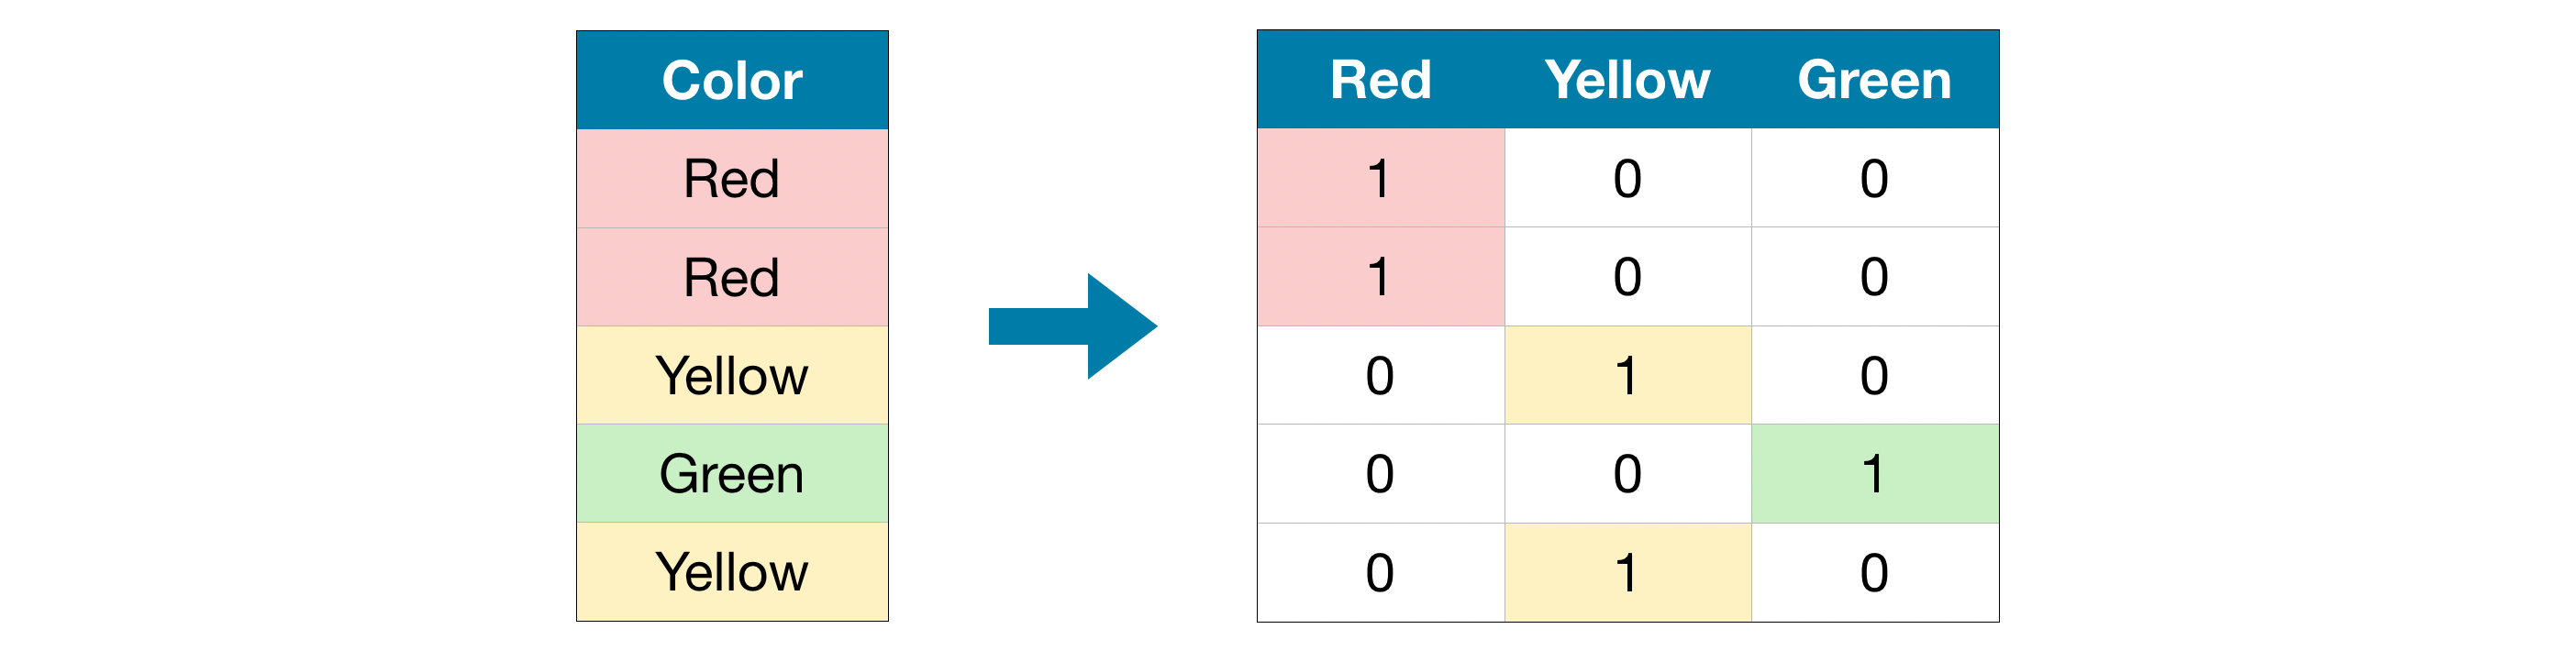

Obviously we cannot do this for the 'date' column right now. An alternatice is to reframe the date values into three columns of year, month, and day of month. This way we will have much less classes.

In [19]:
#df['Date'] = pd.to_datetime(df['Date'])

# extract year from date

#df['Year'] = df['Date'].dt.year

# extract month from date

#df['Month'] = df['Date'].dt.month


# extract day from date

#df['Day'] = df['Date'].dt.day

#df.drop('Date', axis=1, inplace = True)

In [20]:
#Write your code here

Now let's have a look at numerical values

In [21]:
#Write your code here

check missing values in numerical variables

In [22]:
#Write your code here

The describe method is very helpful for numerical features

In [23]:
#Write your code here

we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

In [24]:
# draw boxplots to visualize outliers

#plt.figure(figsize=(15,10))


#plt.subplot(2, 2, 1)
#fig = df.boxplot(column='Rainfall')
#fig.set_title('')
#fig.set_ylabel('Rainfall')


#Write your code here


How to describe outlier:
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

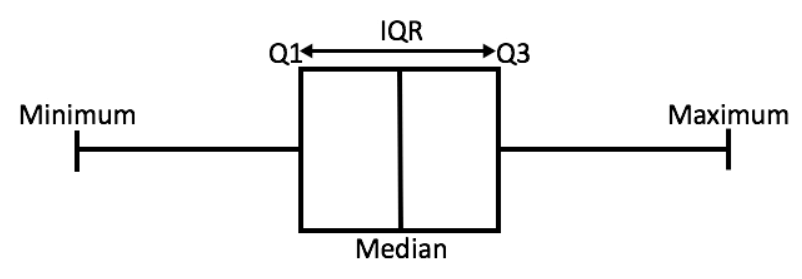

The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

Decision range:

Lower Bound: (Q1 - 1.5 * IQR)

Upper Bound: (Q3 + 1.5 * IQR)

In [25]:
#Write your code here

In [26]:
#Write your code here

### Correlation Analysis

Relationships between features, and between features with target variable are very important in modeling processes.

In [27]:
#Write your code here

In [28]:
#Write your code here

In [29]:
#plt.figure(figsize=(18,12))
#plt.title('Correlation Heatmap of Rain in Australia Dataset')
#ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
#plt.show()

Which can choose the ones with high correlation and do furtehr analysis to explore their relationships

In [48]:
#num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [30]:
#Write your code here

<a id='section2'></a>
## Feature Processing

First, we need to define the targetvariable and feature vector

In [31]:
#Write your code here

Split X and y into training and testing sets

In [32]:
#Write your code here

In [33]:
#Write your code here

### Numerical Features

In [34]:
#Write your code here

In [35]:
#Write your code here

There are different ways to deal with the missing values. For instance, if we assume that the missing data does not follow a specific pattern and has occured at random, we can simply replace the values with mean or median.

Note that you should treat the test data as if you cannot see it. So for filling the null values, you should use the statistical features of the training data.

In [36]:
#Write your code here

Now let's remove the outliers

In [37]:
#Write your code here

In [152]:
a = np.arange(10)
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [38]:
#Write your code here

### Categorical Features

In [39]:
#Write your code here

In [40]:
#Write your code here

We can fill the missing values with the mode value

In [41]:
#for dataset in [X_train, X_test]:
#    dataset['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
#    dataset['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
#    dataset['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
#    dataset['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

Now we need to encode the values into numbers

In [42]:
#Write your code here

In [43]:
#Write your code here

We can also use the getdummies method

In [44]:
#Write your code here

In [45]:
#Write your code here

Let's do this for every categorical feature

In [46]:
#X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
#                     pd.get_dummies(X_train.Location), 
#                     pd.get_dummies(X_train.WindGustDir),
#                     pd.get_dummies(X_train.WindDir9am),
#                     pd.get_dummies(X_train.WindDir3pm)], axis=1)
#X_train.head()

we need to do the same thing for the test data

In [47]:
#X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
#                     pd.get_dummies(X_test.Location), 
#                     pd.get_dummies(X_test.WindGustDir),
#                     pd.get_dummies(X_test.WindDir9am),
#                     pd.get_dummies(X_test.WindDir3pm)], axis=1)


#X_test.head()

### Scaling

It is very important to scale features before modeling. There is an article in the link below about its importance:
https://www.enjoyalgorithms.com/blog/need-of-feature-scaling-in-machine-learning

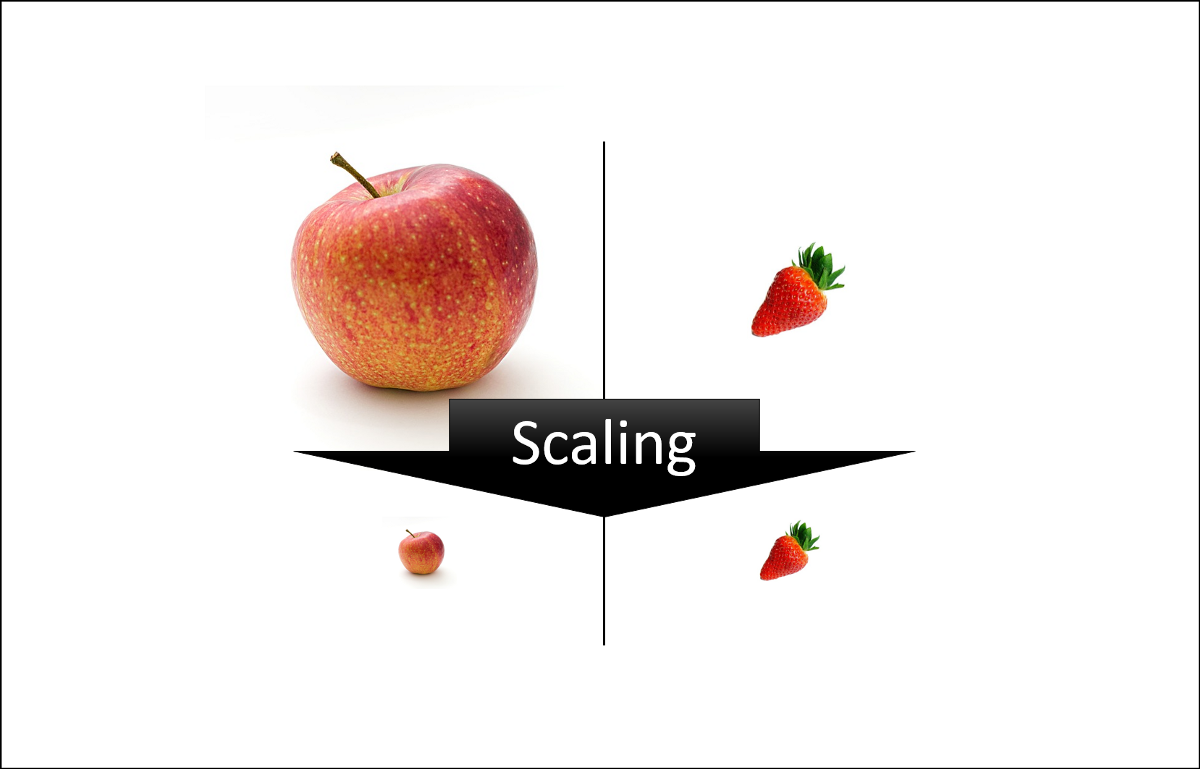

There are different ways to do the scaling, one common approach is to use minmax scaling which Transform features by scaling each feature to a given range (by default the range is 0-1).

In [48]:
#Write your code here

In [49]:
#Write your code here

<a id='section3'></a>
# Model training

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

#### Solver?

Solvers are basically methods for minmizing the loss function in an optimized way.

For instance LIBLINEAR solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

Have a look at this for more info: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions#:~:text=It's%20a%20linear%20classification%20that,coordinate%20directions%20or%20coordinate%20hyperplanes.

Now let's instantiate the model with the liblinear solver:

In [50]:
#Write your code here

In [51]:
#Write your code here

#### What is C?

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Regularization generally refers the concept that there should be a complexity penalty for more extreme parameters. The idea is that just looking at the training data and not paying attention to how extreme one's parameters are leads to overfitting. A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. Basically, a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".
credit: https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression

More info: https://en.wikipedia.org/wiki/Regularization_(mathematics)

now we can predict the X_test

In [52]:
#Write your code here

We can also see how certain the model is in prediction:

In [53]:
#Write your code here

Let's compare the performance of the model on the training set and the test set

In [54]:
#Write your code here

<a id='section4'></a>
## Model Evaluation and performance metrics

There are differnt ways to evaluate your model. 

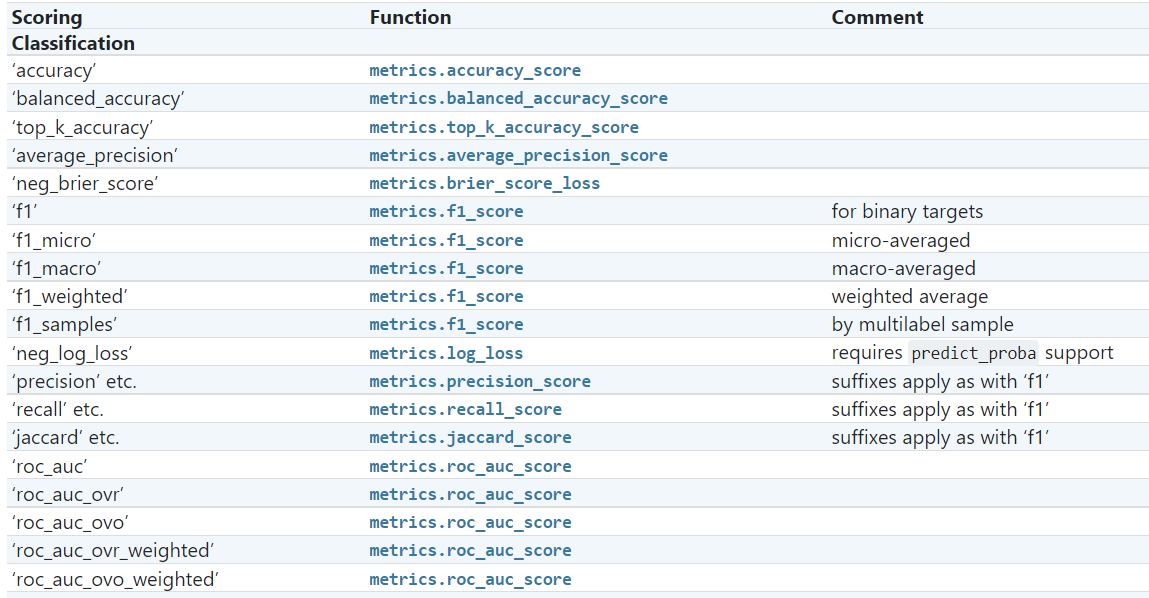

https://scikit-learn.org/stable/modules/model_evaluation.html

First, let's see how accurate our model is.

In [55]:
#Write your code here

### Confusion Matrix, Percision, Recall, Sensitivity, Specificity

Four types of outcomes are possible when a classifier predicts on a test sample:

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [56]:
#Write your code here

In [57]:
#Write your code here

We can visualize these results

In [58]:
#Write your code here

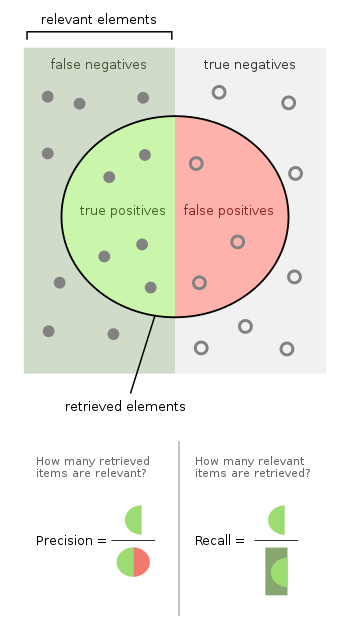

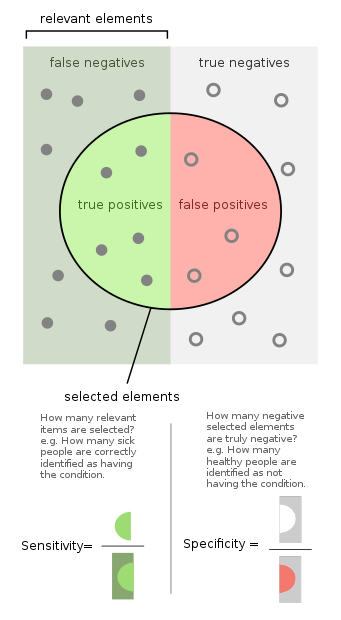

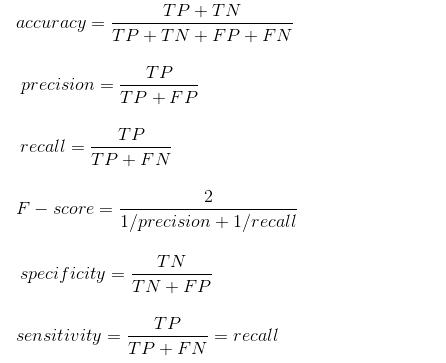

In [59]:
#Write your code here

In [60]:
#Write your code here

Now we can define new metrics based on these

In [61]:
#Write your code here

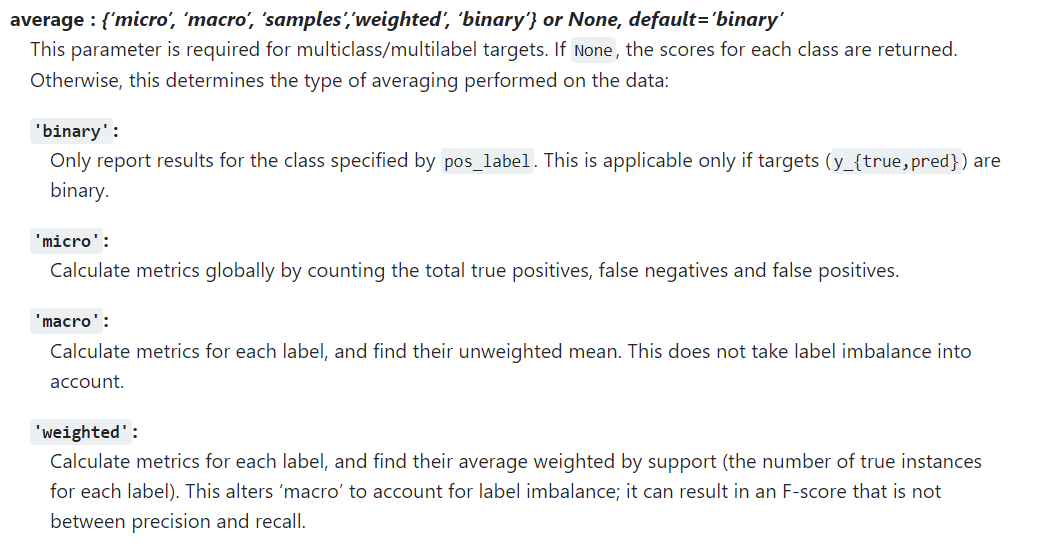

## How can we do better?

### Hyper-paramater Tuning and cross validation

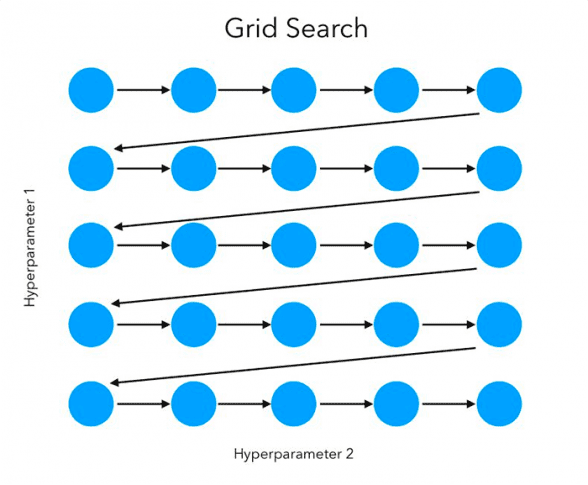

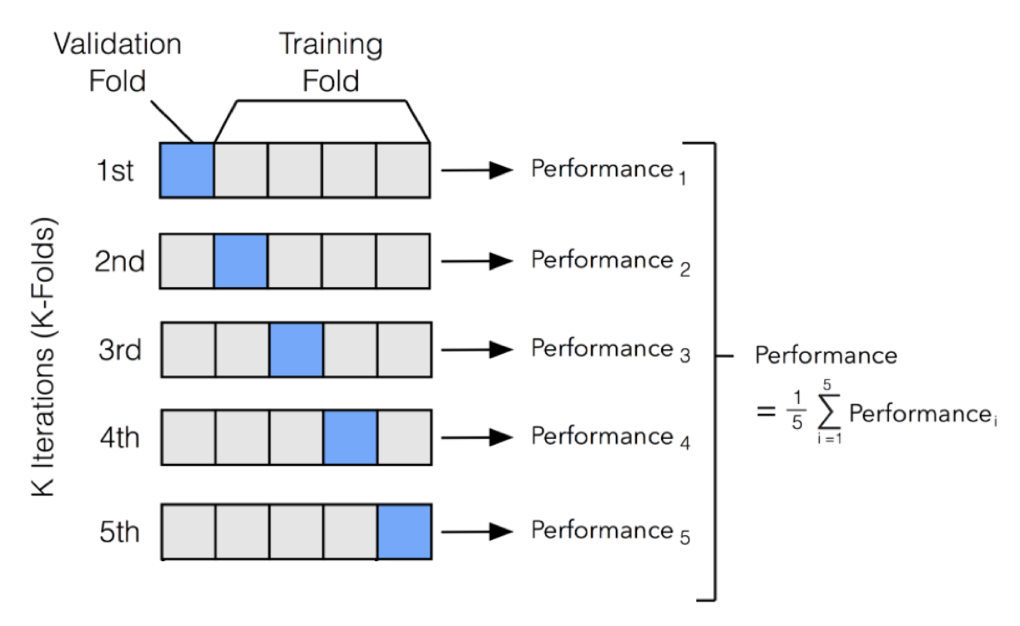

In [62]:
#Write your code here

In [63]:
#Write your code here

In [64]:
#Write your code here